#  TS4: Primeras nociones de estimación espectral 
## Autora: Catalina Gonzalez Araujo y Lola Pampin
## Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit
### 24/09/2025

# I. <u>**Resumen**</u>

En el presente trabajo se buscó analizar el comportamiento de una señal con ruido y su correspondiente procesamiento. Para ello, se sintetizaron 200 realizaciones de una señal sinusoidal con ruido aleatorio en su frecuencia y amplitud (con una distribución uniforme y normal, respectivamente). Se comprobaron 2 SNR distintos, uno igual a 3 dB y otro a 10 dB.

Posteriormente, se realizó el ventaneo de la señal, multiplicándola por distintas ventanas (Rectangular, Blackman, Hamming y Flat-top). 

Finalmente, se calculó la FFT de la señal con ruido ventaneada y se estimó la frecuencia y la energía de la señal. Para su respectivo análisis, se calculó el sesgo y la varianza de estos estimadores.

Los resultados se encuentran dentro del rango esperado y su análisis se observa en la conclusión.

# II. <u>**Introducción**</u>

## 1. <u>**Señales y modelos estocásticos en procesamiento digital de señales**</u>
   
   En el análisis de señales digitales, es común modelar una señal como la combinación de una componente determinística y ruido aleatorio. La señal que se estudia en este trabajo está definida como: $x(k) = a_0 * \sin(\Omega_1 * n) + n_a(n)$

   Donde:
   
-	$a_0 = 2$ es la amplitud de la señal sinusoidal.

-	$\Omega_1 = \Omega_0 + f_r * \frac{2 * \pi}{N}$ es la frecuencia angular de la señal, ligeramente desintonada respecto a $\Omega_0 = \frac{\pi}{2}$.

-	$f_r ≈ U(-2, 2)$ representa un desplazamiento aleatorio uniforme de frecuencia, modelando pequeñas fluctuaciones o incertidumbre en la frecuencia de la señal.

-	$n_a(n) ≈ N(0, \sigma^2)$ es ruido aditivo gaussiano con media cero y varianza $\sigma^2$, que representa perturbaciones aleatorias típicas en sistemas físicos.


Este modelo se conoce como modelo aditivo de señal con ruido, y es la base para muchos estudios de estimación en procesamiento digital de señales.

## 2. <u>**Señal vs Ruido y SNR**</u>
   
   El **SNR (Signal-to-Noise Ratio)** es la relación entre la potencia de la señal y la potencia del ruido: $SNR(dB) = 10 * \log_{10}{\frac{P_{señal}}{P_{ruido}}}$
   
-	Una *SNR* alta indica que la señal es mucho mas fuerte que el ruido, facilitando su detección y estimación. 

-	Una *SNR* baja indica que el ruido domina, haciendo mas difícil estimar correctamente la amplitud y frecuencia de la señal.

## 3. <u>**Distribuciones de probabilidad**</u>
   
   Las distribuciones de probabilidad describen el comportamiento de variables aleatorias:
   
-	Distribución uniforme $U(a,b)$: todos los valores en el intervalo $[a,b]$ tienen la misma probabilidad.

-	Distribución normal $N(\mu, \sigma^2)$: la variable aleatoria tiene mayor probabilidad cerca de la media $\mu$ y menor probabilidad cuanto más se aleja de $\mu$. 

## 4. <u>**Estimacion espectral**</u>

El **análisis espectral** es fundamental para el procesamiento digital de señales, ya que permite medir, estimar y caracterizar cómo se distribuye la energía o la potencia de una señal en el dominio de la frecuencia. Puede aplicarse tanto a señales determinísticas como probabilísticas. 

En general, los problemas del análisis espectral empiezan con funciones en el dominio continuo, las cuales son muestreadas por otra señal, con el objetivo de producir una señal digital $x[n]$. 

La caracterización de señales en el dominio de la frecuencia resulta sencilla:

-	Una señal sinusoidal infinita tiene todo su espectro concentrado en dos frecuencias, $w_0$ y $-w_0$.

-	La *Transformada Discreta de Fourier en el tiempo discreto* (*DTFT*) permite un análisis con resolución infinita en frecuencias.

Sin embargo, estas condiciones no se cumplen en la práctica. No es posible analizar señales de duración finita, por lo que se trabaja con segmentos temporales finitos. Esto introduce efectos de ventaneo, que modifican el espectro observado. Además, al muestrear una señal continua, se debe elegir una frecuencia de muestreo adecuada para evitar aliasing. 

Por estas razones, en aplicaciones reales se utilizan versiones discretas y computacionales de la transformada, como la DFT y su implementación eficiente, la FFT, que permiten obtener estimaciones espectrales a partir de señales digitales de duración finita.

## 5. <u> **Ventaneo** </u>

El diseño de filtros para sistemas FIR se basa en modificar la respuesta de un filtro pasa bajo ideal a través de multiplicarlo por una función ventana w[n].  Uno de los objetivos del filtrado es reducir el leakage espectral.  

La DFTF de una ventana $ W (\omega)= \mathcal{F}\{w(n)\} $ es una función sinc periódica. El pico de la transformada ocurre a $\omega=0$ (valor de continua, ya que no hay frecuencia), y su valor aumenta conforme a la longitud de la ventana.  W($\omega$) tiene N-1 ceros, en el rango de frecuencia $ - \pi< \omega< \pi $,  en los múltiplos de $ 2\pi/N $ ( es decir, $ \omega = 2\pi k/N$ para $0<|k|<(N-1)/2$). Se define al lóbulo principal como el rango de frecuencia entre el primer cruce por cero ($W(\omega)=0$) alrededor de $\omega=0$, o sea, $|\omega|< 2\pi/N$. Por lo tanto, el primer lóbulo tiene un ancho igual a $4\pi/N$. Los lóbulos secundarios son los subsiguientes al principal. Su ancho también es proporcional a N y su atenuación respecto al principal incrementa con la frecuencia. 

Cada ventana tiene un trade – off entre resolución espectral (capacidad de separar frecuencias cercanas) y precisión en la amplitud.

A continuación se definen los filtros de ventanas más comunes: 

### *Rectangular*

La mejor aproximación a un filtro ideal en términos de error cuadrático medio es truncar la respuesta al impulso de un filtro pasa bajo ideal. Para un filtro de longitud par N, truncar la respuesta al impulso es equivalente a multiplicarlo por una ventana rectangular definida como 

$$
w[n] = rect_N[n] \triangleq 
\begin{cases}
1 & \text{si } |x| \leq (N-1)/2  \\\\
0 & \text{en otro caso} 
\end{cases}
$$
La DTFT de la ventana rectangular se define como $W (\omega)= \mathcal{F}\{rect_N(n)\} = N \frac{\mathrm{sinc}\left(\frac{\omega N}{2}\right)}{\mathrm{sinc}\left(\frac{\omega}{2}\right)}$



Esta ventana se caracteriza por tener una alta resolución en frecuencia, pero alto leakage. En filtros FIR tiene una pobre atenuación fuera de banda, ya que trunca el valor de la respuesta al impulso, y esto genera ripples en la respuesta en frecuencia.Las ventanas que disminuyen este efecto se denominan de coseno elevado, que son compuestas por la suma de cosenos. Su definición es 

$$
w[n] = 
\begin{cases}
\sum_{k=0}^{L-1} a_k \cdot \cos\left( \frac{2\pi k n}{N - 1} \right), & \text{si } |n| \leq \frac{N - 1}{2} \\
0, & \text{en otro caso}
\end{cases}
$$

Las empleadas en el presente trabajo son Flat-top, Blackman y Han. Su definición se encuentra a continuación.

### *Flat - top*

Este tipo de ventana se caracteriza por poseer una muy buena precisión en la estimación de amplitud en el dominio de la frecuencia, a costo de un mayor derrame espectral. Minimiza los errores en la magnitud de picos espectrales. Su definición matemática se encuentra dada por la siguiente ecuación:

$$
w[n] = a_0 - a_1 \cos\left(\frac{2\pi n}{N-1}\right) + a_2 \cos\left(\frac{4\pi n}{N-1}\right) - a_3 \cos\left(\frac{6\pi n}{N-1}\right) + a_4 \cos\left(\frac{8\pi n}{N-1}\right)
$$
Donde, 
$$
\begin{aligned}
a_0 &= 1.0 \\
a_1 &= 1.93 \\
a_2 &= 1.29 \\
a_3 &= 0.388 \\
a_4 &= 0.028
\end{aligned}
$$

La ventana Flat Top se emplea típicamente en el análisis de señales donde los picos de frecuencia son distintos y están bien separados entre sí. Una aplicación común de este tipo de ventana es la calibración. En resumen, la ventana de Hann reduce el leakeage y no posee descontinuidades (es suave), pero posee un ancho de banda mayor, lo que reduce su resolución en frecuencia.

## *Hann*
Su definición par y centrada en n=0 es:

$$
hann_N[n] \triangleq 0.5 + 0.5 cos (\frac {2\pi n}{N - 1}), |n| \leq (N-1)/2
$$


Los coeficientes son establecidos para crear un decaimiento de -18 dB/octava en los lóbulos secundarios.  Este tipo de ventana es función de una única variable y no posee discontinuidades en sus puntos finales. 



## *Blackman*
Su definición matemática es 

$$
blackman_N[n]=0.42+0.5 cos (\left( \frac{2\pi n}{N - 1} \right)) + 0.8 cos (\left( \frac{4\pi n}{N - 1} \right)), |n| \leq (N-1)/2
$$

La magnitud del lóbulo central es baja (cerca de los -60 dB) y los lóbulos secundarios decaen con una pendiente de -18 dB/octava (igual que en la ventana de Hann). Esta ventana también es una función de un único parámetro. Gracias a sus coeficientes, esta ventana logra reducir significativamente la fuga espectral, pero posee mayor complejidad computacional que algunas ventanas más simples como la de Hann o la rectangular. Es útil para detectar señales con bajo SNR.

## 6. <u>**Estimadores de amplitud y frecuencia**</u>

   Un **estimador** es una regla o fórmula que permite calcular un valor aproximado de un parámetro desconocido de una señal a partir de datos observados.
   
Para estimar la amplitud $a_1$ y la frecuencia $\omega_1$ de la señal, se usan los siguientes estimadores basados en la *DFT* de la señal ventana $w_i(n)$: 

-	**Estimador de amplitud**: intenta determinar el valor real de la amplitud de la señal sinusoidal a partir de sus muestras 

$$
a^{1}_{i} = \left| X^{w}_{i}(\Omega_{0}) \right| = \left| \mathrm{DFT} \left\{ x(n) \cdot w_{i}(n) \right\} \right|_{\Omega_{0}}
$$

-   **Estimador de frecuencia**: busca aproximar la frecuencia real de la señal

$$
\Omega^{1}_{i} = \arg\max_{\Omega} \left| X^{w}_{i}(\Omega) \right|
$$

Es decir, la amplitud se obtiene evaluando el módulo de la DFT en la frecuencia nominal $\Omega_0$, mientras que la frecuencia se estima buscando el máximo del espectro de la señal ventana.

## 7. <u>**Sesgo y varianza de estimadores**</u>

   Un estimador se evalua en términos de **sesgo** y **varianza**, que reflejan su precisión y consistencia.
    
-	Sesgo ($s_a$): es la diferencia entre la media esperada del estimador y el valor real: 
$$
s_a = E\{\hat{a}_0\} - a_0
$$

-	Varianza ($v_a$): medida de la dispersión de los resultados alrededor de la media:
$$
v_a = \text{var}\{\hat{a}_0\} = E\left\{(\hat{a}_0 - E\{\hat{a}_0\})^2\right\}
$$

	Cuando se trabaja con simulaciones o experimentos numéricos, los valores esperados se aproximan mediante promedios muestrales sobre $M$ realizaciones: 

$$
E\{\hat{a}_0\} = \hat{\mu}_a = \frac{1}{M} \sum_{j=0}^{M-1} \hat{a}_j, \quad s_a = \hat{\mu}_a - a_0, \quad v_a = \frac{1}{M} \sum_{j=0}^{M-1} (\hat{a}_j - \hat{\mu}_a)^2
$$

   De manera análoga, se puede calcular el sesgo y varianza del estimador de frecuencias $\Omega_1$.

Para el cálculo de estos valores es necesario obtener el "centro de masa" de las realizaciones, es decir, el promedio de valores que tuvo la magnitud que deseo medir. En este trabajo en particular se utiliza la *mediana*, que es una medida estadística que representa el valor que se encuentra en la mitad de un conjunto de datos ordenados. Para calcularla, primero se ordenan los datos de menor a mayor (o de mayor a menor) y luego se encuentra el valor que se encuentra en el centro del conjunto de datos. Si hay un número par de datos, la mediana es el promedio de los dos valores centrales. Es útil para describir la posición central de un conjunto de datos y es menos sensible a valores extremos o atípicos que la media.


# III. **Desarrollo**

In [43]:
# %% Librerias + variables
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.signal import windows
from scipy import stats


# Declaracion de varibles

N = 1000 # Cantidad de muestras
fs = N # Frecuencia de muestreo
df = fs/N # Resolucion temporal
a0 = 2 # Amplitud
realizaciones = 200 # Sirve para parametrizar la cantidad de realizaciones de sampling ->muestras que vamos a tomar de la frecuencia
omega_0 = fs / 4 # fs/4 -> mitad de banda digital
fr = np.random.uniform(-2,2) # Variable aleatoria de distribucion normal para la frecuencia
omega_1 = omega_0 + fr * df
nn = np.arange(N) # Vector dimensional de muestras
ff = np.arange(N) # Vector en frecuencia al escalar las muestras por la resolucion espectral

# Signal to noise ratio en dB segun pide la consigna
SNR3=3
SNR10 = 10

In [44]:
# %% FUNCION SENOIDAL
def mi_funcion_sen(frecuencia, nn, amplitud = 1, offset = 0, fase = 0, fs = 2):   

    N = np.arange(nn)
    
    t = N / fs

    x = amplitud * np.sin(2 * np.pi * frecuencia * t + fase) + offset

    return t, x

t1,s1 = mi_funcion_sen(frecuencia = omega_1*df, nn = N, fs = fs, amplitud = a0) # Funcion senoidal con frecuencia aleatoria

In [45]:
# %% Calculo las potencias para ver que machean

# SNR = 3dB
pot_ruido3 = a0**2 / (2*10**(SNR3/10))
print(f"Potencia del SNR = 3dB -> {pot_ruido3:.3f}")
ruido3 = np.random.normal(0, np.sqrt(pot_ruido3), N) # Vector
var_ruido3 = np.var(ruido3)
print(f"Potencia de ruido con SNR = 3dB -> {var_ruido3:.3f}")

x1_snr3 = s1 + ruido3  # Modelo de señal --> señal limpia + ruido

# SNR = 10dB
pot_ruido10 = a0**2 / (2*10**(SNR10/10))
print(f"Potencia del SNR = 10dB -> {pot_ruido10:.3f}")
ruido10 = np.random.normal(0, np.sqrt(pot_ruido10), N) # Vector
var_ruido10 = np.var(ruido10)
print(f"Potencia de ruido con SNR = 10dB -> {var_ruido10:.3f}")

x1_snr10 = s1 + ruido10  # Modelo de señal --> señal limpia + ruido

Potencia del SNR = 3dB -> 1.002
Potencia de ruido con SNR = 3dB -> 0.963
Potencia del SNR = 10dB -> 0.200
Potencia de ruido con SNR = 10dB -> 0.205


In [46]:
# %% CALCULO LAS DFT

S1 = (1/N)*fft(s1)
# modulo_S1 = np.abs(S1)**2

# SNR = 3dB
RUIDO3 = (1/N)*fft(ruido3)

# Calculo la FFT
X1_snr3 = (1/N)*fft(x1_snr3) # Multiplico por 1/N para calibrarlo --> llevar el piso de ruido a cero

# SNR = 10dB
RUIDO10 = (1/N)*fft(ruido10)

# Calculo la FFT
X1_snr10 = (1/N)*fft(x1_snr10) # Multiplico por 1/N para calibrarlo --> llevar el piso de ruido a cero


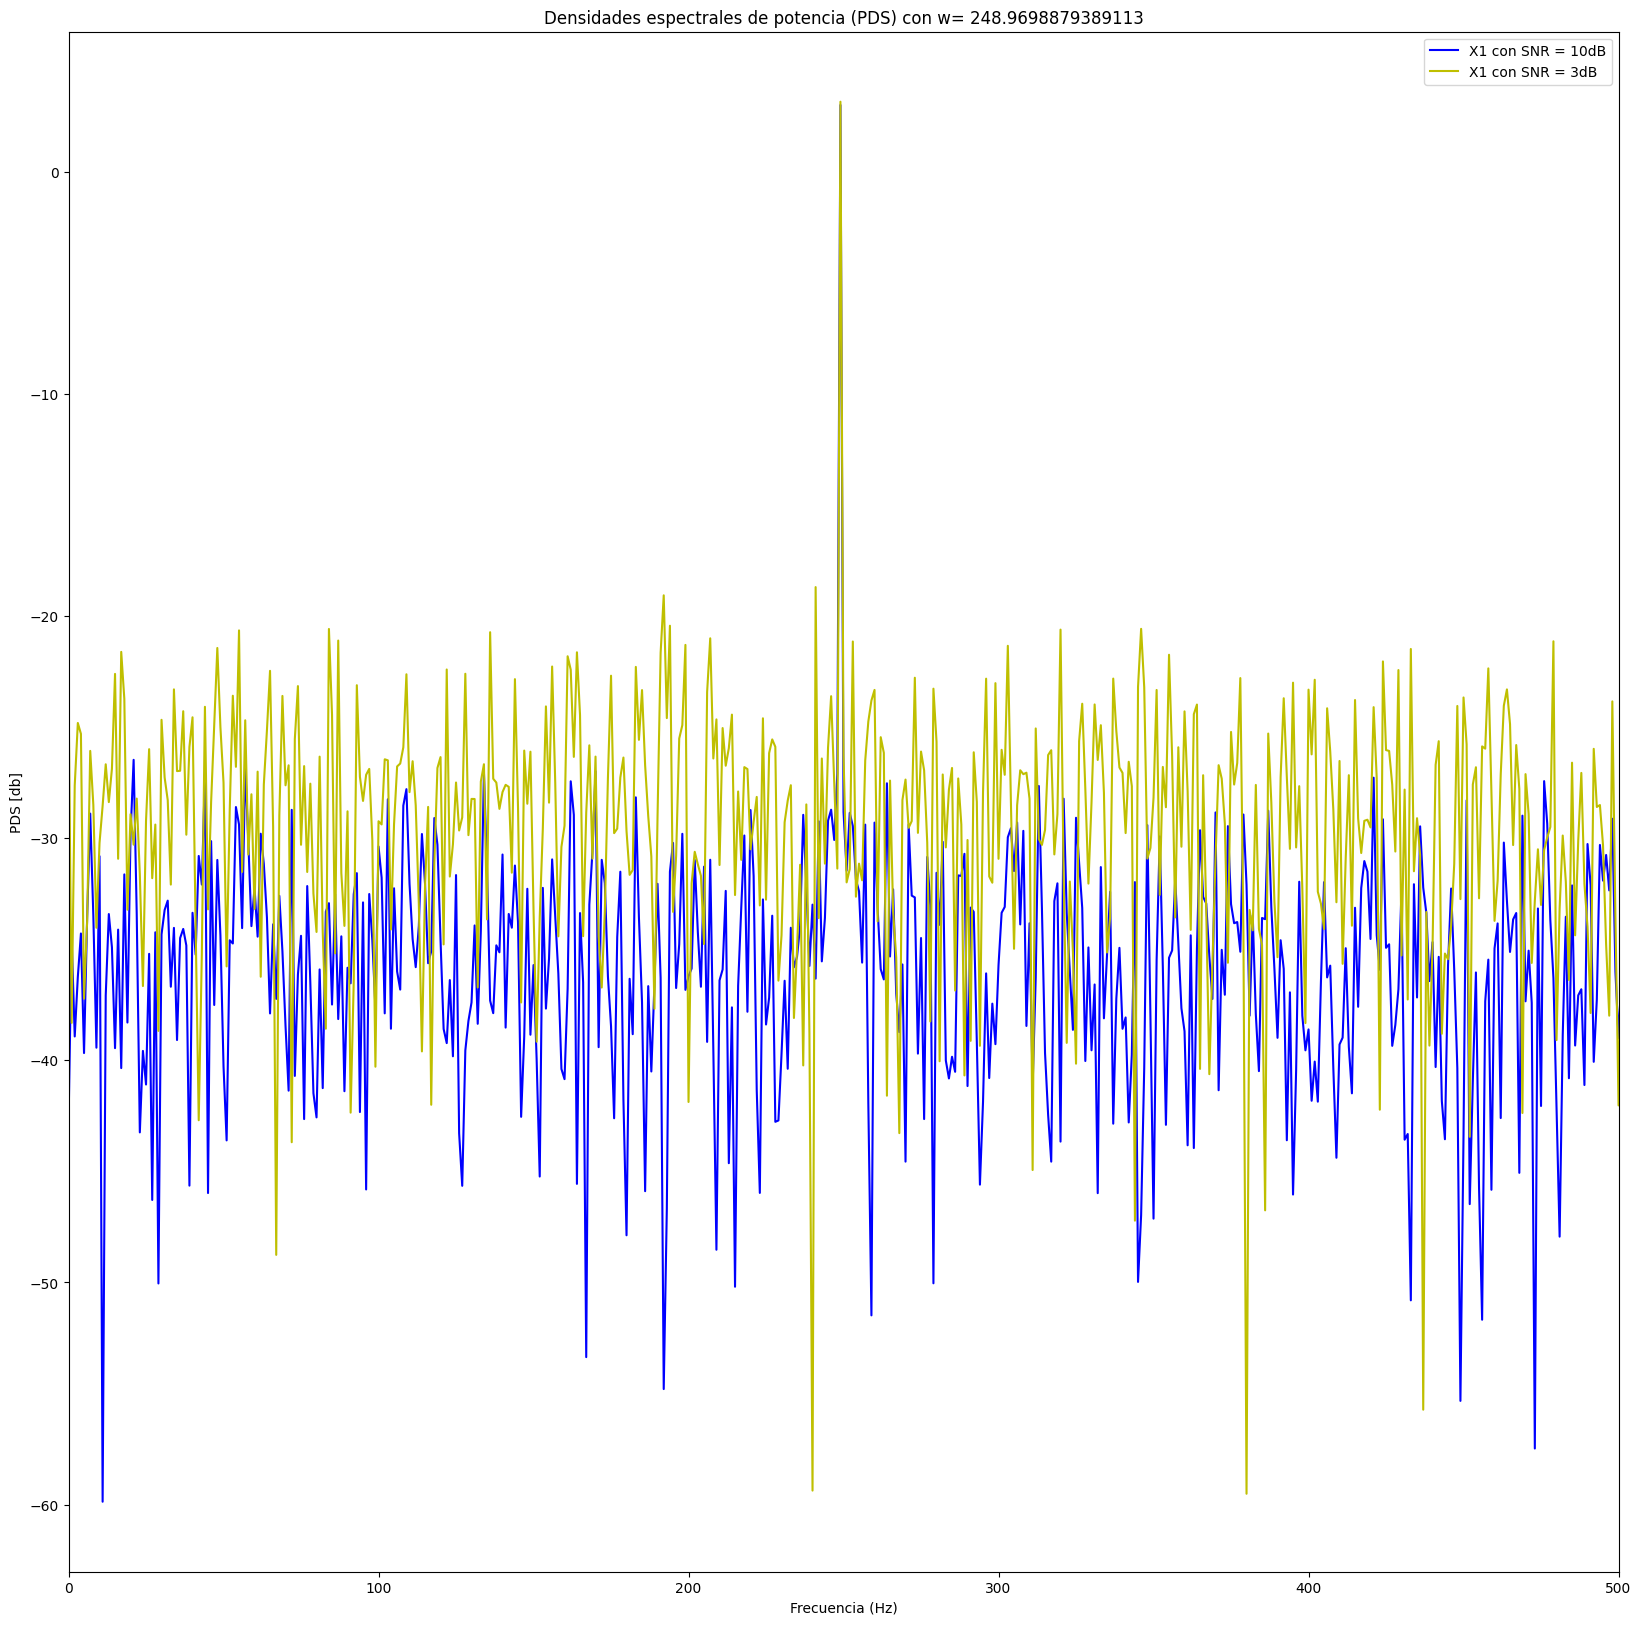

In [47]:
# %% GRAFICO senal + ruido
fig, axes = plt.subplots(1, 1, figsize=(20, 20))
plt.title("Densidades espectrales de potencia (PDS) con w= " + str(omega_1*df))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.xlim([0, fs/2]) # En este caso fs = N, pero pongo fs para saber que va eso y no va siempre N

plt.plot(ff, np.log10(2*np.abs(X1_snr10)**2) * 10,color='b', label = 'X1 con SNR = 10dB')  # Densidad espectral de potencia
plt.plot(ff, np.log10(2*np.abs(X1_snr3)**2) * 10, color='y',label = 'X1 con SNR = 3dB')  # Densidad espectral de potencia
plt.legend()
plt.show()

In [ ]:
# %% Realizo las 200 realizaciones
k0 = omega_1
t = np.arange(N).reshape(-1,1) / fs # reshape para que las columnas sean tiempo
t_mat = np.tile(t, (1, realizaciones)) # (1000, 200)


# Repetir fr en filas (mismo valor de frecuencias por columna)
frecuencias = (k0 + fr) * df # en Hz
f_mat = np.tile(frecuencias, (N, 1))  # (1000, 200)


# Matriz de senoidales
s_mat = a0 * np.sin(2 * np.pi * f_mat * t_mat) # (1000, 200)

# RUIDO con SNR = 3dB
pot_ruido3 = a0**2 / (2 * 10**(SNR3 / 10))
ruido_mat3 = np.random.normal(0, np.sqrt(pot_ruido3), size = (N, realizaciones))  # (1000, 1)

x_mat3 = s_mat + ruido_mat3

# RUIDO con SNR = 10dB
pot_ruido10 = a0**2 / (2 * 10**(SNR10 / 10))
ruido_mat10 = np.random.normal(0, np.sqrt(pot_ruido10), size = (N, realizaciones))  # (1000, 1)

x_mat10 = s_mat + ruido_mat10

# Calculo la FFT normalizada a lo largo del eje del tiempo (filas)
X_mat3 = (1/N) * fft(x_mat3, axis=0)
X_mat10 = (1/N) * fft(x_mat10, axis=0)

# Grafico señal + ruido
plt.figure(figsize=(20,20))
plt.suptitle('FFT Señal + ruido')
plt.subplot(1,2,1)
plt.title('SNR 3dB')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat3)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])


plt.subplot(1,2,2)
plt.title('SNR 10dB')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat10)**2) * 10)
plt.xlim([0, fs/2])

plt.show()


In [ ]:
# %% Señales ventaneadas

# SNR = 3dB
x_vent_fla3 = x_mat3 * (windows.flattop(N).reshape(-1,1))
x_vent_BM3 = x_mat3 * (windows.blackman(N).reshape(-1,1))
x_vent_R3 = x_mat3 * (windows.boxcar(N).reshape(-1,1))
x_vent_H3 = x_mat3 * (windows.hamming(N).reshape(-1,1))

# Calculo la FFT normalizada a lo largo del eje del tiempo (filas)
X_mat_ft3 = (1/N) * fft(x_vent_fla3, axis=0)
X_mat_BM3 = (1/N) * fft(x_vent_BM3, axis=0)
X_mat_R3 = (1/N) * fft(x_vent_R3, axis=0)
X_mat_H3 = (1/N) * fft(x_vent_H3, axis=0)

# Graficos de la transformada de senales ventanadas con ruido
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
plt.suptitle("Señal con ruido 3dB ventaneada")

plt.subplot(2,2,1)
plt.title('BLACKMAN')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_BM3)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.subplot(2,2,2)
plt.title('RECTANGULAR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_R3)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.subplot(2,2,3)
plt.title('HAMMING')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_H3)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.subplot(2,2,4)
plt.title('FLAT-TOP')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_ft3)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.tight_layout()
plt.show()

In [ ]:
#Ventaneo y graficos de la senales con ruido

# SNR = 10dB
x_vent_fla10 = x_mat10 * (windows.flattop(N).reshape(-1,1))
x_vent_BM10 = x_mat10 * (windows.blackman(N).reshape(-1,1))
x_vent_R10 = x_mat10 * (windows.boxcar(N).reshape(-1,1))
x_vent_H10 = x_mat10 * (windows.hamming(N).reshape(-1,1))

# Calculo la FFT normalizada a lo largo del eje del tiempo (filas)
X_mat_ft10 = (1/N) * fft(x_vent_fla10, axis=0)
X_mat_BM10 = (1/N) * fft(x_vent_BM10, axis=0)
X_mat_R10 = (1/N) * fft(x_vent_R10, axis=0)
X_mat_H10 = (1/N) * fft(x_vent_H10, axis=0)

# Graficos de la transformada de senales ventanadas con ruido
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
plt.suptitle("Señal con ruido 10dB ventaneada")

plt.subplot(2,2,1)
plt.title('BLACKMAN')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_BM10)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.subplot(2,2,2)
plt.title('RECTANGULAR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_R10)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.subplot(2,2,3)
plt.title('HAMMING')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_H10)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.subplot(2,2,4)
plt.title('FLATOP')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PDS [db]')
plt.plot(ff, np.log10(2*np.abs(X_mat_ft10)**2) * 10)  # Densidad espectral de potencia
plt.xlim([0, fs/2])

plt.tight_layout()
plt.show()

In [ ]:
# %% Estimador de energia

trans = 0.35
bins = 10

# SNR = 3dB
estimador_a_FT_3= 10*np.log10(2*(np.abs(X_mat_ft3[N//4,:])**2))
estimador_a_BM_3= 10*np.log10(2*(np.abs(X_mat_BM3[N//4,:])**2))
estimador_a_R_3= 10*np.log10(2*(np.abs(X_mat_R3[N//4,:])**2))
estimador_a_H_3= 10*np.log10(2*(np.abs(X_mat_H3[N//4,:])**2))

# SNR = 10dB
estimador_a_FT_10= 10*np.log10(2*(np.abs(X_mat_ft10[N//4,:])**2))
estimador_a_BM_10= 10*np.log10(2*(np.abs(X_mat_BM10[N//4,:])**2))
estimador_a_R_10= 10*np.log10(2*(np.abs(X_mat_R10[N//4,:])**2))
estimador_a_H_10= 10*np.log10(2*(np.abs(X_mat_H10[N//4,:])**2))

# Grafico el histograma
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
plt.suptitle("Histograma de la estimación de energía")

plt.subplot(1,2,1)
plt.title("SNR = 3dB")
plt.hist(estimador_a_BM_3, label = 'Blackman', alpha = trans, bins = bins)
plt.hist(estimador_a_R_3,label = 'Rectangular', alpha = trans, bins = bins)
plt.hist(estimador_a_H_3,label = 'Hamming', alpha = trans, bins = bins)
plt.hist(estimador_a_FT_3,label = 'Flatop', alpha = trans, bins = bins)
plt.xlabel('PDS [db]')
plt.ylabel('#Cantidad de ocurrencias')
plt.legend()

plt.subplot(1,2,2)
plt.title("SNR = 10dB")
plt.hist(estimador_a_BM_10, label = 'Blackman', alpha = trans, bins = bins)
plt.hist(estimador_a_R_10,label = 'Rectangular', alpha = trans, bins = bins)
plt.hist(estimador_a_H_10,label = 'Hamming', alpha = trans, bins = bins)
plt.hist(estimador_a_FT_10,label = 'Flatop', alpha = trans, bins = bins)
plt.xlabel('PDS [db]')
plt.ylabel('#Cantidad de ocurrencias')
plt.legend()

plt.show()

In [ ]:
# %% Estimador de frecuencia

# Defino rango de frecuencias (en Hz)
freqs = np.fft.fftfreq(N, 1/fs)  # Eje de frecuencias
freqs = freqs[:N//2] 

# SNR = 3 dB
mag_FT3 = np.abs(X_mat_ft3[:N//2, :])
idx_FT3 = np.argmax(mag_FT3, axis=0)
est_frec_FT_3 = idx_FT3 * df

mag_BM3 = np.abs(X_mat_BM3[:N//2, :])
idx_BM3 = np.argmax(mag_BM3, axis=0)
est_frec_BM_3 = idx_BM3 * df

mag_R3 = np.abs(X_mat_R3[:N//2, :])
idx_R3 = np.argmax(mag_R3, axis=0)
est_frec_R_3 = idx_R3 * df

mag_H3 = np.abs(X_mat_H3[:N//2, :])
idx_H3 = np.argmax(mag_H3, axis=0)
est_frec_H_3 = idx_H3 * df


# SNR = 10 dB 
mag_FT10 = np.abs(X_mat_ft10[:N//2, :])
idx_FT10 = np.argmax(mag_FT10, axis=0)
est_frec_FT_10 = idx_FT10 * df

mag_BM10 = np.abs(X_mat_BM10[:N//2, :])
idx_BM10 = np.argmax(mag_BM10, axis=0)
est_frec_BM_10 = idx_BM10 * df

mag_R10 = np.abs(X_mat_R10[:N//2, :])
idx_R10 = np.argmax(mag_R10, axis=0)
est_frec_R_10 = idx_R10 * df

mag_H10 = np.abs(X_mat_H10[:N//2, :])
idx_H10 = np.argmax(mag_H10, axis=0)
est_frec_H_10 = idx_H10 * df

# Grafico los histogramas
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
plt.suptitle("Histograma del estimador de frecuencia")

plt.subplot(1,2,1)
plt.title("SNR = 3 dB")
plt.hist(est_frec_BM_3, label = 'Blackman', alpha = trans, bins = 30)
plt.hist(est_frec_R_3, label = 'Rectangular', alpha = trans, bins = 30)
plt.hist(est_frec_FT_3, label = 'Flattop', alpha = trans, bins = 30)
plt.hist(est_frec_H_3, label = 'Hamming', alpha = trans, bins = 30)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("#Cantidad de ocurrencias")
plt.legend()

plt.subplot(1,2,2)
plt.title("SNR = 10 dB")
plt.hist(est_frec_BM_10, label = 'Blackman', alpha = trans, bins = 30)
plt.hist(est_frec_R_10, label = 'Rectangular', alpha = trans, bins = 30)
plt.hist(est_frec_FT_10, label = 'Flattop', alpha = trans, bins = 30)
plt.hist(est_frec_H_10, label = 'Hamming', alpha = trans, bins = 30)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("#Cantidad de ocurrencias")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# %% SESGO Y VARIANZA

# Valor real de referencia en dB para amplitud
amplitud_referencia_dB = 10 * np.log10(a0) # Valor real (teorico) de la amplitud pasando a dB

# Sesgo de los estimadores de amplitud (SNR = 3dB), valor medio calculado a traves de la mediana
sesgo_amp_rectangular3 = np.median(estimador_a_R_3) - amplitud_referencia_dB
sesgo_amp_blackman3 = np.median(estimador_a_BM_3) - amplitud_referencia_dB
sesgo_amp_flattop3 = np.median(estimador_a_FT_3) - amplitud_referencia_dB
sesgo_amp_hamming3 = np.median(estimador_a_H_3) - amplitud_referencia_dB

var_amp_rectangular3 = stats.median_abs_deviation(estimador_a_R_3, center = np.median)
var_amp_blackman3 = stats.median_abs_deviation(estimador_a_BM_3, center = np.median)
var_amp_flattop3 = stats.median_abs_deviation(estimador_a_FT_3, center = np.median)
var_amp_hamming3 = stats.median_abs_deviation(estimador_a_H_3, center = np.median)

print("\n===== Amplitud (dB) =====")
print("SNR = 3dB")
print(f"Rectangular: sesgo = {sesgo_amp_rectangular3:.4f}, varianza = {var_amp_rectangular3:.4f}")
print(f"Blackman: sesgo = {sesgo_amp_blackman3:.4f}, varianza = {var_amp_blackman3:.4f}")
print(f"Flat-top: sesgo = {sesgo_amp_flattop3:.4f}, varianza = {var_amp_flattop3:.4f}")
print(f"Hamming: sesgo = {sesgo_amp_hamming3:.4f}, varianza = {var_amp_hamming3:.4f}")

# Sesgo de los estimadores de amplitud (SNR = 10 dB)
sesgo_amp_rectangular10 = np.median(estimador_a_R_10) - amplitud_referencia_dB
sesgo_amp_blackman10 = np.median(estimador_a_BM_10) - amplitud_referencia_dB
sesgo_amp_flattop10 = np.median(estimador_a_FT_10) - amplitud_referencia_dB
sesgo_amp_hamming10 = np.median(estimador_a_H_10) - amplitud_referencia_dB

var_amp_rectangular10 = stats.median_abs_deviation(estimador_a_R_10, center = np.median)
var_amp_blackman10 = stats.median_abs_deviation(estimador_a_BM_10, center = np.median)
var_amp_flattop10 = stats.median_abs_deviation(estimador_a_FT_10, center = np.median)
var_amp_hamming10 = stats.median_abs_deviation(estimador_a_H_10, center = np.median)


print("\nSNR = 10dB")
print(f"Rectangular: sesgo = {sesgo_amp_rectangular10:.4f}, varianza = {var_amp_rectangular10:.4f}")
print(f"Blackman: sesgo = {sesgo_amp_blackman10:.4f}, varianza = {var_amp_blackman10:.4f}")
print(f"Flat-top: sesgo = {sesgo_amp_flattop10:.4f}, varianza = {var_amp_flattop10:.4f}")
print(f"Hamming: sesgo = {sesgo_amp_hamming10:.4f}, varianza = {var_amp_hamming10:.4f}")

# Valor real de la frecuencia en Hz
f_referencia = omega_0 * df

# Sesgo de los estimadores de frecuencia (SNR = 3 dB)
sesgo_frec_rectangular3 = np.median(est_frec_R_3) - f_referencia
sesgo_frec_blackman3 = np.median(est_frec_BM_3) - f_referencia
sesgo_frec_flattop3 = np.median(est_frec_FT_3) - f_referencia
sesgo_frec_hamming3 = np.median(est_frec_H_3) - f_referencia

# Varianza de los estimadores de frecuencia (SNR = 3 dB)
var_frec_rectangular3 = stats.median_abs_deviation(est_frec_R_3, center = np.median) 
var_frec_blackman3 = stats.median_abs_deviation(est_frec_BM_3, center = np.median) 
var_frec_flattop3 = stats.median_abs_deviation(est_frec_FT_3, center = np.median) 
var_frec_hamming3 = stats.median_abs_deviation(est_frec_H_3, center = np.median) 

print("\n===== Frecuencia (Hz) =====")
print("\nSNR = 3dB")
print(f"Rectangular: sesgo = {sesgo_frec_rectangular3:.4f}, varianza = {var_frec_rectangular3:.4f}")
print(f"Blackman: sesgo = {sesgo_frec_blackman3:.4f}, varianza = {var_frec_blackman3:.4f}")
print(f"Flat-top: sesgo = {sesgo_frec_flattop3:.4f}, varianza = {var_frec_flattop3:.4f}")
print(f"Hamming: sesgo = {sesgo_frec_hamming3:.4f}, varianza = {var_frec_hamming3:.4f}")


# Sesgo de los estimadores de frecuencia (SNR = 10 dB)
sesgo_frec_rectangular10 = np.median(est_frec_R_10) - f_referencia
sesgo_frec_blackman10 = np.median(est_frec_BM_10) - f_referencia
sesgo_frec_flattop10 = np.median(est_frec_FT_10) - f_referencia
sesgo_frec_hamming10 = np.median(est_frec_H_10) - f_referencia

var_frec_rectangular10 = stats.median_abs_deviation(est_frec_R_10, center = np.median) 
var_frec_blackman10 = stats.median_abs_deviation(est_frec_R_10, center = np.median) 
var_frec_flattop10 = stats.median_abs_deviation(est_frec_FT_10, center = np.median) 
var_frec_hamming10 = stats.median_abs_deviation(est_frec_H_10, center = np.median) 

print("\nSNR = 10dB")
print(f"Rectangular: sesgo = {sesgo_frec_rectangular10:.4f}, varianza = {var_frec_rectangular10:.4f}")
print(f"Blackman: sesgo = {sesgo_frec_blackman10:.4f}, varianza = {var_frec_blackman10:.4f}")
print(f"Flat-top: sesgo = {sesgo_frec_flattop10:.4f}, varianza = {var_frec_flattop10:.4f}")
print(f"Hamming: sesgo = {sesgo_frec_hamming10:.4f}, varianza = {var_frec_hamming10:.4f}")


# III. **Conclusiones**
En resumen, se puede decir que se logró sintetizar correctamente la señal con los dos SNR propuestos. El SNR indica cuánta energía tiene la señal sobre el ruido; por lo tanto, mientras mayor sea, permitirá que el pico de la señal se distinga con mayor claridad, ya que el piso de ruido se ubicará más abajo. Esto se puede observar en el “techo de ruido” de los gráficos realizados para las FFT de la señal con ruido, donde para los 3 dB se encuentra en -20 dB, y para el caso de los 10 dB, en -30 dB aproximadamente. 
Luego, al realizar los histogramas de los estimadores, los resultados también fueron coherentes. Esto se afirma debido a que los valores que se observan en el eje horizontal coinciden con los observados en los gráficos de las FFT para cada ventana. Es decir, si se realiza un zoom en la frecuencia de mitad de banda digital (pico de energía de la señal, aproximadamente 250 Hz), se puede observar el mismo rango de valores de PDS que en el eje x del histograma de frecuencias. De forma análoga, lo mismo ocurre para el histograma de energía. El rango de valores obtenidos coincide con los picos de las transformadas de las señales ventaneadas para las distintas realizaciones.

Para finalizar, se realizó un análisis de la calidad de los estimadores. Un estimador se considera ideal cuando es asintóticamente insesgado y su varianza tiende a 0 cuando el número de muestras tiende a infinito. 
En nuestro caso, los valores del sesgo obtenidos para la amplitud resultaron negativos; esto quiere decir que, en promedio, el estimador subestima el valor real de la señal. Además, se observó que el sesgo varía según la ventana utilizada: fue más leve en el caso de la ventana Rectangular (-4,8 dB) y más pronunciado en la Flat-top (-13,3 dB). La varianza, en cambio, disminuyó al aumentar la relación señal-ruido, lo cual refleja una mayor estabilidad de las estimaciones en condiciones de menor ruido. 
Respecto a la frecuencia, se observó que en todos los casos el sesgo se mantuvo constante en 1 Hz, y la varianza nula, independientemente de la ventana utilizada o del valor del SNR (no hubo dispersión para los valores obtenidos del estimador). Esto parece coherente, debido a que al ver el histograma de frecuencias, se puede observar que las barras no se prolongan en el eje x. Por el contrario, son finas y altas, lo que quiere decir que los valores de frecuencias que se pudieron medir no son muy dispersos.
En síntesis, la frecuencia presenta un sesgo fijo no asociado a las condiciones de ruido, mientras que la amplitud depende de la ventana utilizada y mejora su precisión a medida que aumenta el SNR.
